# 数据分析师招聘岗位分析

## 编程环境准备

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
from scipy.stats import norm,mode
import re
from wordcloud import WordCloud
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
warnings.filterwarnings('ignore')

## 数据读取

In [2]:
# 读取csv，并且添加header
df = pd.read_csv('data/boss.csv',header=None,names=\
    ['company','position','address','salary','requires','lables','tags'])
df.head()


,company,position,address,salary,requires,lables,tags
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程"
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划"
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学"
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,"
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师"


In [4]:
# 数据基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   company   2537 non-null   object
 1   position  2537 non-null   object
 2   address   2537 non-null   object
 3   salary    2537 non-null   object
 4   requires  2537 non-null   object
 5   lables    2537 non-null   object
 6   tags      2537 non-null   object
dtypes: object(7)
memory usage: 138.9+ KB


In [5]:
# 数据量，2537行7列
df.shape

(2537, 7)

## 数据清洗

### 去除重复数据

In [6]:
# 统计重复数据
df.duplicated().sum()

11

In [8]:
# 删除重复数据
df.drop_duplicates(keep='first',inplace=True)

In [9]:
# 再次查看有无重复数据
df.duplicated().sum()

0

In [10]:
# 去重后数据行数减少11行
df.shape

(2526, 7)

### 去除“实习”行数

In [11]:
# 因为实习的薪资和全职计算不一样，所以去掉含有‘实习’的行，以方便统计
x=df['position'].str.contains('实习')
df=df[~x]
df.reset_index(drop=True,inplace=True)


In [12]:
# 检查数据行数
df.shape

(2472, 7)

### 查看address字段是否需要清洗

In [13]:
df['address'].unique()

array(['长沙', '成都', '郑州', '重庆', '南京', '武汉', '厦门', '杭州', '北京', '广州', '上海',
       '深圳', '苏州', '天津', '西安'], dtype=object)

## address可以使用，查看salary字段

In [14]:
df['salary'].unique()

array(['9-14K', '2-3K', '5-10K', '3-8K', '10-15K', '8-13K', '5-6K',
       '10-15K·15薪', '8-10K·14薪', '7-9K', '10-15K·13薪', '5-9K', '5-8K',
       '6-10K', '8-12K', '5-7K', '15-20K', '4-7K', '30-50K·14薪', '4-6K',
       '3-7K', '10-15K·14薪', '7-8K', '4-5K', '11-18K', '12-17K·15薪',
       '11-12K', '7-12K', '20-25K', '7-12K·13薪', '8-13K·13薪',
       '15-25K·16薪', '4-9K', '8-10K', '4-8K', '3-6K', '12-20K', '10-11K',
       '12-24K', '3-4K', '6-7K', '6-8K', '8-12K·13薪', '6-10K·13薪',
       '8-11K', '12-15K·13薪', '3-5K·14薪', '6-11K', '8-15K', '10-11K·16薪',
       '15-30K·16薪', '2-7K', '15-20K·13薪', '15-30K', '10-13K·13薪',
       '18-35K', '12-16K·13薪', '3-5K', '12-18K·14薪', '11-22K', '14-20K',
       '8-12K·15薪', '10-12K·15薪', '12-24K·13薪', '8-13K·15薪', '12-18K',
       '15-25K', '20-30K·13薪', '7-10K', '11-20K·14薪', '18-35K·13薪',
       '20-40K', '11-16K·13薪', '12-14K', '11-14K·13薪', '4-8K·13薪', '6-9K',
       '25-35K·15薪', '15-28K·13薪', '11-20K', '8-12K·14薪', '20-30K·16薪',
       '5-10K·1

### 将薪资列的值进行拆分，新增bottom，top两列，作为一个岗位薪资的最低值和最高值，单值的，用button填充top

In [16]:
df['bottom']=df['salary'].str.extract('^(\d+).*')
df['top']=df['salary'].str.extract('^.*?-(\d+).*')
df['top'].fillna(df['bottom'],inplace=True)
df.head()

,company,position,address,salary,requires,lables,tags,bottom,top
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程",9,14
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划",2,3
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学",5,10
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,",3,8
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师",10,15


### 有些公司标注1X薪等，故新增一列commission_pct计算每个岗位的奖金率

In [17]:
df['commision_pct']=df['salary'].str.extract('^.*?·(\d{2})薪')
df['commision_pct'].fillna(12,inplace=True)
df['commision_pct']=df['commision_pct'].astype('float64')
df['commision_pct']=df['commision_pct']/12

### 把bottom，top，commission__pct列转换为数值，计算出每个岗位的平均薪资avg_salary

In [19]:
df['bottom'] = df['bottom'].astype('int64')
df['top'] = df['top'].astype('int64')
df['avg_salary'] = (df['bottom']+df['top'])/2*df['commision_pct']
df['avg_salary'] = df['avg_salary'].astype('int64')

cols=list(df)
cols.insert(4,cols.pop(cols.index('bottom')))
cols.insert(5,cols.pop(cols.index('top')))
cols.insert(6,cols.pop(cols.index('commision_pct')))
cols.insert(7,cols.pop(cols.index('avg_salary')))
df=df.loc[:,cols]
df.head()

,company,position,address,salary,bottom,top,commision_pct,avg_salary,requires,lables,tags
0,安存科技,数据分析师,长沙,9-14K,9,14,1.0,11,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程"
1,名利天下,数据分析师,长沙,2-3K,2,3,1.0,2,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划"
2,长沙沃邦,数据分析师,长沙,5-10K,5,10,1.0,7,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学"
3,谊品,数据分析师,长沙,3-8K,3,8,1.0,5,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,"
4,众美健康,数据分析师,长沙,10-15K,10,15,1.0,12,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师"


In [20]:
# 查看数值数据描述
df.describe()

,bottom,top,commision_pct,avg_salary
count,2472.000000,2472.000000,2472.000000,2472.000000
mean,12.621764,21.355178,1.067894,18.395227
std,8.410919,15.055249,0.111316,13.952061
min,1.000000,3.000000,1.000000,2.000000
25%,6.000000,9.000000,1.000000,7.000000
50%,10.000000,15.000000,1.000000,13.000000
75%,18.000000,30.000000,1.083333,26.000000
max,90.000000,120.000000,2.000000,122.000000


### 去掉一些极端值，这里设置平均值为3k-70k

In [21]:
df=df[(df.avg_salary>3)&(df.avg_salary<70)]
df.describe()

,bottom,top,commision_pct,avg_salary
count,2432.000000,2432.000000,2432.000000,2432.000000
mean,12.534951,21.247122,1.067914,18.257401
std,7.836120,14.377763,0.111021,13.180500
min,2.000000,5.000000,1.000000,4.000000
25%,6.000000,10.000000,1.000000,7.000000
50%,10.000000,15.000000,1.000000,14.000000
75%,18.000000,30.000000,1.083333,26.000000
max,50.000000,80.000000,2.000000,66.000000


### 观察“招聘要求”字段

In [22]:
df['requires'].unique()

array(['1-3年本科', '经验不限大专', '3-5年大专', '经验不限本科', '3-5年本科', '1-3年硕士',
       '1-3年大专', '1年以内大专', '5-10年本科', '1-3年学历不限', '1年以内本科', '在校/应届本科',
       '5-10年大专', '3-5年硕士', '1年以内学历不限', '经验不限学历不限', '1年以内硕士', '1年以内高中',
       '5-10年硕士', '1-3年高中', '在校/应届大专', '经验不限中专/中技', '经验不限硕士', '1-3年中专/中技',
       '在校/应届硕士', '10年以上本科', '3-5年学历不限', '1-3年博士', '5-10年学历不限', '5-10年博士',
       '经验不限博士', '经验不限高中', '10年以上硕士'], dtype=object)

### 将经验需求拆分出来放入experience字段，学历要求放入diploma字段

In [23]:
df['experience']=df['requires'].str.extract('^(\d+/?-\d+)')
df['diploma']=df['requires'].str[-2:]
df.head()

,company,position,address,salary,bottom,top,commision_pct,avg_salary,requires,lables,tags,experience,diploma
0,安存科技,数据分析师,长沙,9-14K,9,14,1.0,11,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程",1-3,本科
2,长沙沃邦,数据分析师,长沙,5-10K,5,10,1.0,7,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学",NaN,大专
3,谊品,数据分析师,长沙,3-8K,3,8,1.0,5,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,",3-5,大专
4,众美健康,数据分析师,长沙,10-15K,10,15,1.0,12,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师",NaN,本科
5,百川创意,数据分析工程师,长沙,8-13K,8,13,1.0,10,1-3年本科,互联网,"分配策略,数据分析工程师,业务发展趋势,业务分析,渠道",1-3,本科


### 查看experience和diploma字段，替换null为'经验不限'

In [24]:
df['experience'].unique()

array(['1-3', nan, '3-5', '5-10'], dtype=object)

In [25]:
df['experience'].replace('1-3','1-3年',inplace=True)
df['experience'].replace('3-5','3-5年',inplace=True)
df['experience'].replace('5-10','5-10年',inplace=True)
df['experience'].replace(np.nan,'经验不限',inplace=True)
df['experience'].unique()

array(['1-3年', '经验不限', '3-5年', '5-10年'], dtype=object)

In [26]:
df['diploma'].unique()

array(['本科', '大专', '硕士', '不限', '高中', '中技', '博士'], dtype=object)

### 观察lables列，对数量较少且为传统行业的数据归入其他行业

In [27]:
pd.set_option('max_row',100) 
df['lables'].value_counts()

互联网            677
移动互联网          301
计算机软件          236
电子商务           197
数据服务           144
游戏              65
在线教育            57
生活服务            53
医疗              50
贸易/进出口          43
O2O             43
人力资源服务          42
企业服务            37
物流/仓储           30
批发/零售           29
其他行业            29
信息安全            21
计算机服务           21
环保              21
银行              20
服装/纺织/皮革        20
咨询              19
智能硬件            19
广告              19
通信/网络设备         16
工程施工            14
新零售             14
证券/期货           13
食品/饮料/烟酒        13
社交网络            13
电子/半导体/集成电路     11
房地产             10
培训机构            10
制药              10
其他服务业            9
其他专业服务           8
旅游               6
地产经纪             6
投资/融资            6
汽车生产             6
文化/体育/娱乐         5
机械设备/机电/重工       4
仪器仪表/工业自动化       4
日化               4
新能源              4
餐饮               3
学术/科研            3
媒体               3
检测/认证            3
电力/热力/燃气/水利      2
分类信息             2
酒店               2
交通/运输       

In [28]:
df.loc[~df['lables'].isin(['互联网','计算机软件','移动互联网','电子商务','数据服务','信息安全','计算机服务','咨询','智能硬件','社交网络',
                           '互联网金融','游戏','在线教育','生活服务','O2O','医疗健康','贸易/进出口','物流/仓储 ','企业服务','银行','新零售']),'lables']='其他行业'
df['lables'].value_counts()

互联网       677
其他行业      452
移动互联网     301
计算机软件     236
电子商务      197
数据服务      144
游戏         65
在线教育       57
生活服务       53
O2O        43
贸易/进出口     43
企业服务       37
计算机服务      21
信息安全       21
银行         20
智能硬件       19
咨询         19
新零售        14
社交网络       13
Name: lables, dtype: int64

## 数据可视化和简单的分析

### 城市薪资水平条形图

<AxesSubplot:xlabel='address'>

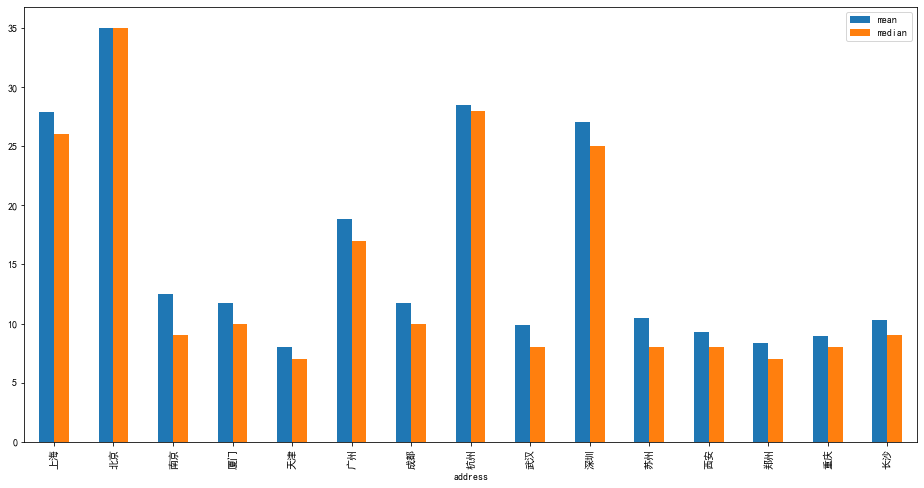

In [37]:
df.avg_salary.groupby(df['address']).agg(['mean','median']).plot.bar(figsize=(16,8))

通过上图，可以发现北上深杭这四个城市的工资水平远远高于其他城市，广州苏州稍为靠后
靠前的这几个城市都分布在东部，中部城市薪资水平普遍低一些

### 薪资分段直方图

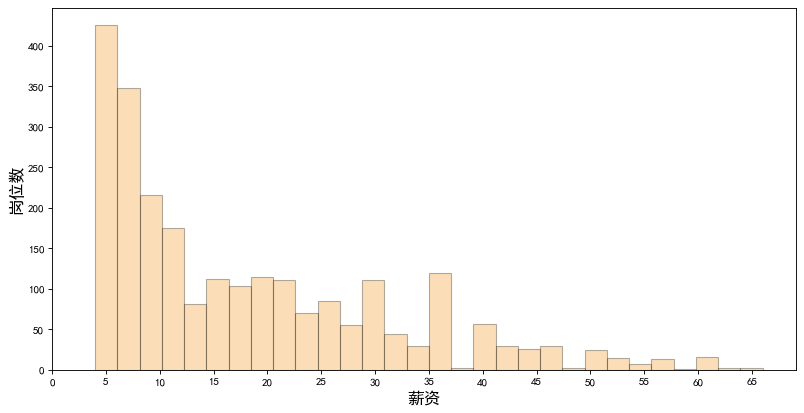

In [30]:
fig=plt.figure(figsize=(12,6),dpi=80)
plt.hist(df['avg_salary'],bins=30,color='#f59311',alpha=0.3,edgecolor='k')
plt.ylabel('岗位数',fontsize=15)
plt.xlabel('薪资',fontsize=15)
plt.xticks(list(range(0,70,5)))
plt.show();

上图显示，少部分人高工资，月薪一万至两万的岗位不在少数。然而四千至五千的岗位居然是最多的。

### 城市薪资饼图

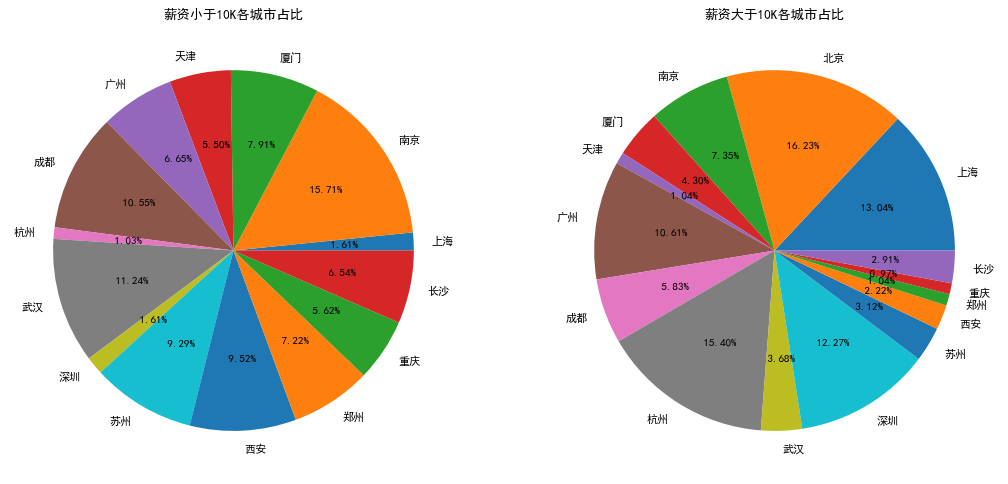

In [32]:
plt.figure(figsize=(16,16),dpi=80)
plt.subplot(121)
temp = df[df.avg_salary<10].groupby('address').avg_salary.count()
plt.pie(temp,labels=temp.index,autopct='% .2f%%')
plt.title('薪资小于10K各城市占比')
plt.subplot(122)
temp = df[df.avg_salary>10].groupby('address').avg_salary.count()
plt.pie(temp,labels=temp.index,autopct='% .2f%%')
plt.title('薪资大于10K各城市占比')
plt.show();

从以上饼图可以看到，各城市间薪资水平差异非常大，低薪岗位主要分布于江苏及中西部城市，北上杭深相对工资就高一些。

### 城市薪资水平箱型图

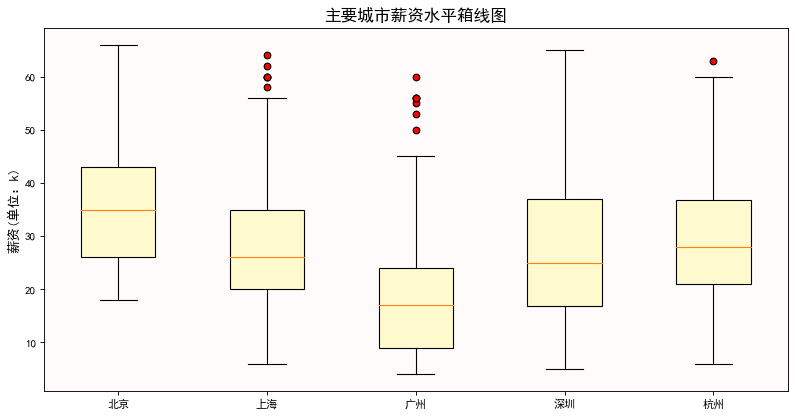

In [33]:
data1=df[df.address=='北京']['avg_salary']
data2=df[df.address=='上海']['avg_salary']
data3=df[df.address=='广州']['avg_salary']
data4=df[df.address=='深圳']['avg_salary']
data5=df[df.address=='杭州']['avg_salary']
plt.figure(figsize=(12,6),dpi=80)
plt.boxplot([data1,data2,data3,data4,data5],labels=['北京','上海','广州','深圳','杭州'], 
            flierprops={'marker':'o','markerfacecolor':'r','color':'k'},
            patch_artist=True,boxprops={'color':'k','facecolor':'#FFFACD'})
ax=plt.gca()
ax.patch.set_facecolor('#FFFAFA')
ax.patch.set_alpha(0.8)
plt.title('主要城市薪资水平箱线图',fontsize=15)
plt.ylabel('薪资(单位：k)',fontsize=12)
plt.show();

选取薪资水平较高的五个城市进行分析可以发现，北京的薪资水平是最高的，杭州上海深圳相对两级分化大一些

### 各学历薪资条形图

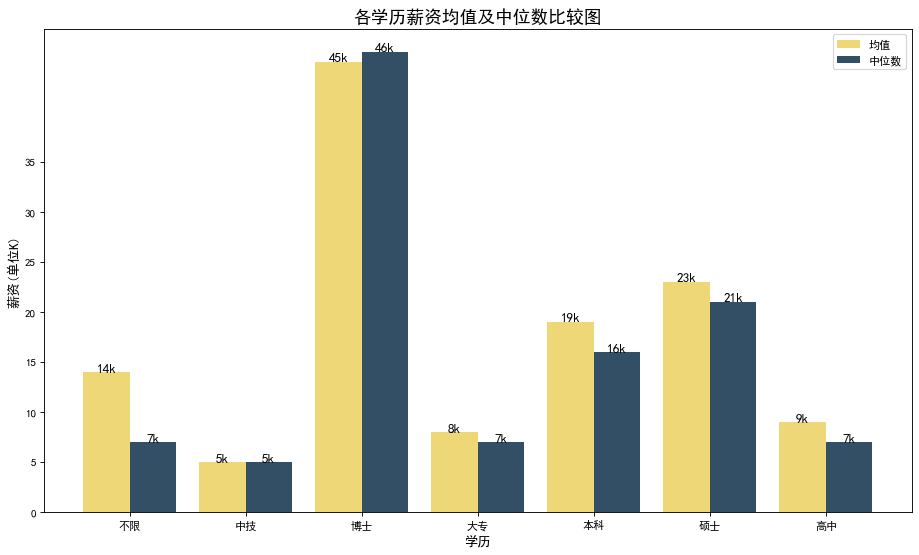

In [34]:
d = df['avg_salary'].groupby(df['diploma'])
d_avg = d.mean()
c = list(d_avg.index)
v = list(range(1,len(c)+1))
w = d_avg.values.astype('int64')
x = d.median().values.astype('int64')
move = 0.4
plt.figure(figsize=(14,8),dpi=80)
plt.bar(v,w,width=move,color='#eed777')
plt.bar([i+move for i in v],x,width=move,color='#334f65')
a = np.arange(0,7)+1.2
plt.xticks(a,c)
plt.yticks(list(range(0,40,5)))
plt.legend(['均值','中位数'])
plt.title('各学历薪资均值及中位数比较图',fontsize=16)
plt.xlabel('学历',fontsize = 12)
plt.ylabel('薪资(单位K)',fontsize = 12)
for e,f in zip(v,w):
    plt.text(e,f,'{}k'.format(f),ha='center',fontsize=12)
for g,h in zip([i+move for i in v],x):
    plt.text(g,h,'{}k'.format(h),ha='center',fontsize=12)
plt.show();

从学历看是否是本科，对薪资水平的影响很大。
本科与硕士之间并没有特别大的差距，博士的薪资水平远远高于其他学历。

### 各学历市场需求饼图

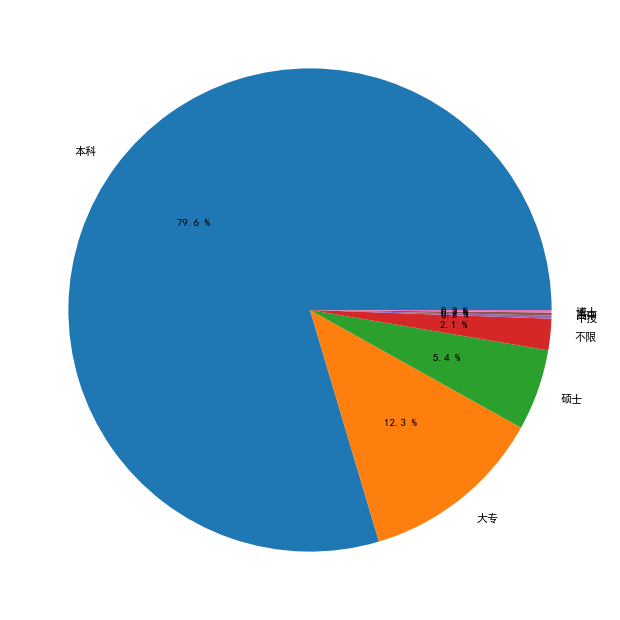

In [35]:
data = df['diploma'].value_counts()
y=data.values
plt.figure(figsize=(10,10),dpi=80)
plt.pie(y,labels=data.index,autopct='%.1f %%')
plt.show();

从市场需求来看，要求本科占据绝大多数，要求硕士的较少，而博士则是极少数

### 工作年限和薪资的关系条形图

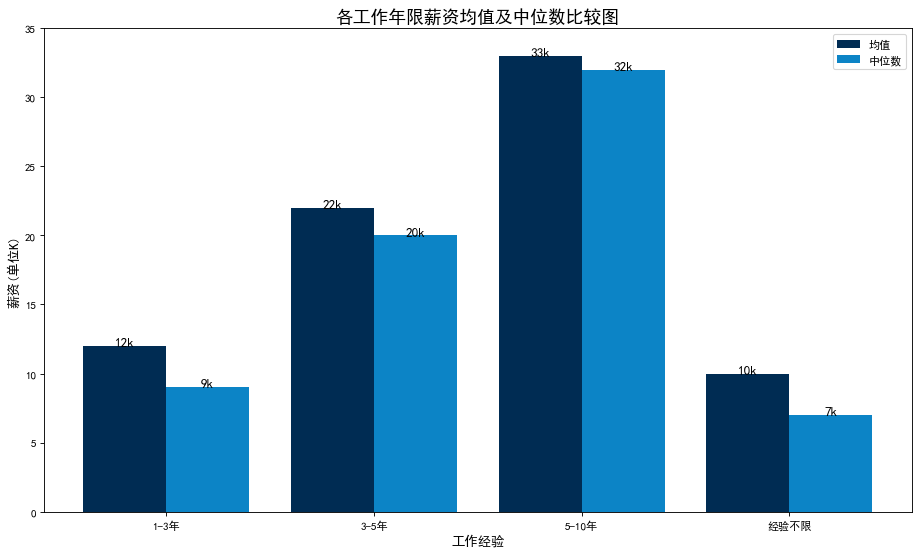

In [36]:
d = df['avg_salary'].groupby(df['experience'])
d_avg = d.mean()
c = list(d_avg.index)
v = list(range(1,len(c)+1))
w = d_avg.values.astype('int64')
x = d.median().values.astype('int64')
move = 0.4
plt.figure(figsize=(14,8),dpi=80)
plt.bar(v,w,width=move,color='#002c53')
plt.bar([i+move for i in v],x,width=move,color='#0c84c6')
a = np.arange(0,4)+1.2
plt.xticks(a,c)
plt.yticks(list(range(0,40,5)))
plt.legend(['均值','中位数'])
plt.title('各工作年限薪资均值及中位数比较图',fontsize=16)
plt.xlabel('工作经验',fontsize = 12)
plt.ylabel('薪资(单位K)',fontsize = 12)
for e,f in zip(v,w):
    plt.text(e,f,'{}k'.format(f),ha='center',fontsize=12)
for g,h in zip([i+move for i in v],x):
    plt.text(g,h,'{}k'.format(h),ha='center',fontsize=12)
plt.show();

应届生的工资还是比较低的，一旦有3年工作经验，工资水平将直线上升。

### 工作经验和薪资关系饼图

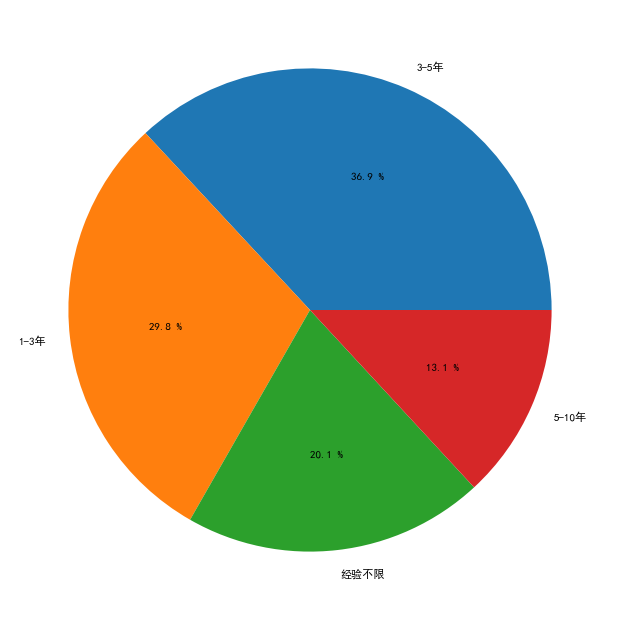

In [37]:
data = df['experience'].value_counts()
y=data.values
plt.figure(figsize=(10,10),dpi=80)
plt.pie(y,labels=data.index,autopct='%.1f %%')
plt.show();

市场上对于工作经验的要求还是很强烈，1-5年的经验要求占绝大多数，工作经验是入职成功与否的关键因素。

### 行业和薪资关系条形图

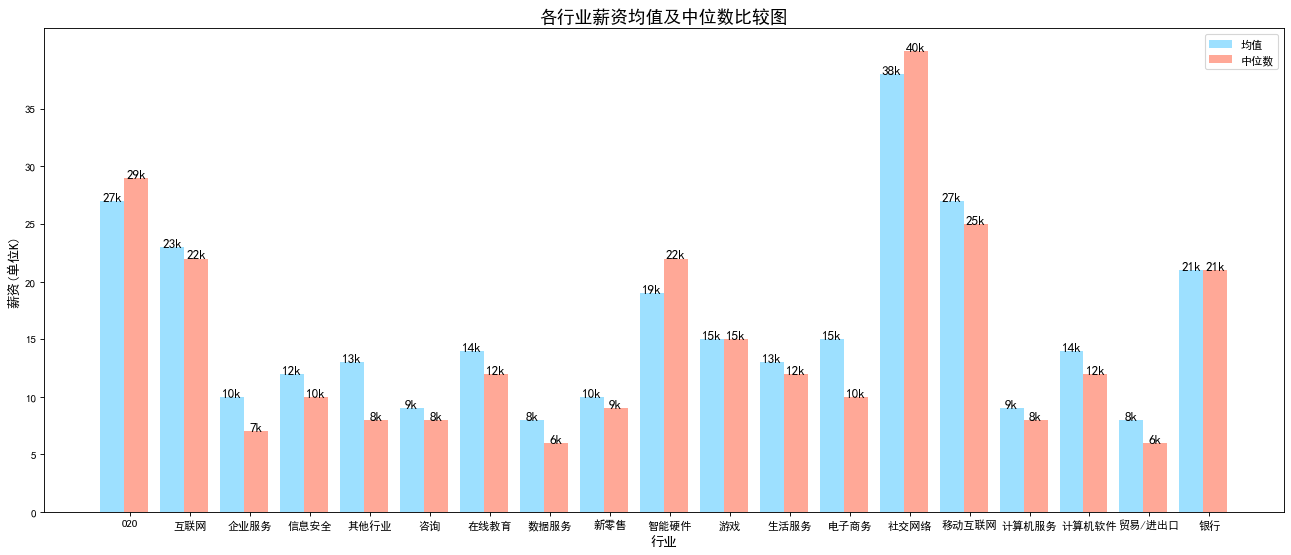

In [38]:
d = df['avg_salary'].groupby(df['lables'])
d_avg = d.mean()
c = list(d_avg.index)
v = list(range(1,len(c)+1))
w = d_avg.values.astype('int64')
x = d.median().values.astype('int64')
move = 0.4
plt.figure(figsize=(20,8),dpi=80)
plt.bar(v,w,width=move,color='#9de0ff')
plt.bar([i+move for i in v],x,width=move,color='#ffa897')
a = np.arange(0,19)+1.3
plt.xticks(a,c)
plt.yticks(list(range(0,40,5)))
plt.legend(['均值','中位数'])
plt.title('各行业薪资均值及中位数比较图',fontsize=16)
plt.xlabel('行业',fontsize = 12)
plt.ylabel('薪资(单位K)',fontsize = 12)
for e,f in zip(v,w):
    plt.text(e,f,'{}k'.format(f),ha='center',fontsize=12)
for g,h in zip([i+move for i in v],x):
    plt.text(g,h,'{}k'.format(h),ha='center',fontsize=12)
plt.show();

社交网络、移动互联网等新兴行业的薪资明显高于其他行业

### 行业和岗位需求关系饼图

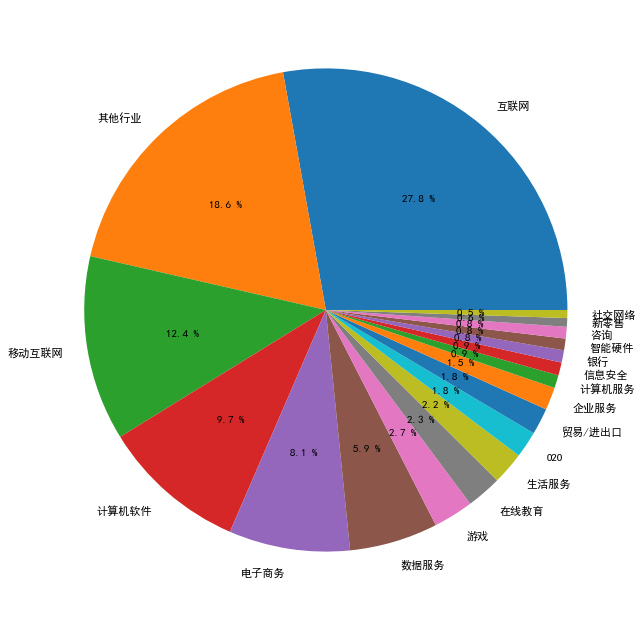

In [39]:
data = df['lables'].value_counts()
y=data.values
plt.figure(figsize=(10,10),dpi=80)
plt.pie(y,labels=data.index,autopct='%.1f %%')
plt.show();

上2图显示 互联网行业和电子商务对该岗位的需求非常大，同时薪资水平相比于其他行业也高了很多
而其他传统行业相对来说，无论是需求量还是薪资水平，都低一些

### 招聘要求的词云分析

<Figure size 720x576 with 0 Axes>

(-0.5, 899.5, 599.5, -0.5)

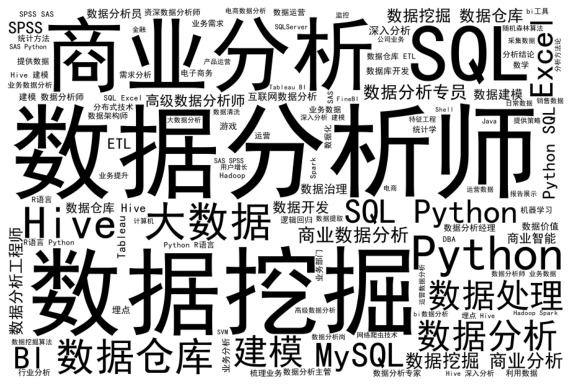

In [40]:
from wordcloud import WordCloud
text = df['tags'].dropna().to_string()
# 绘制词云图
plt.figure(figsize=(10,8))
wordcloud = WordCloud(font_path = "simhei.ttf",
                      background_color = "white",
                      min_font_size = 10,
                      color_func = lambda *args, **kwargs:(0,0,0),
                      width = 900, height = 600).generate(text)
plt.imshow(wordcloud)
plt.axis("off")

发现有些意义不大的字段重复率高，去掉以后再看

<Figure size 720x576 with 0 Axes>

(-0.5, 899.5, 599.5, -0.5)

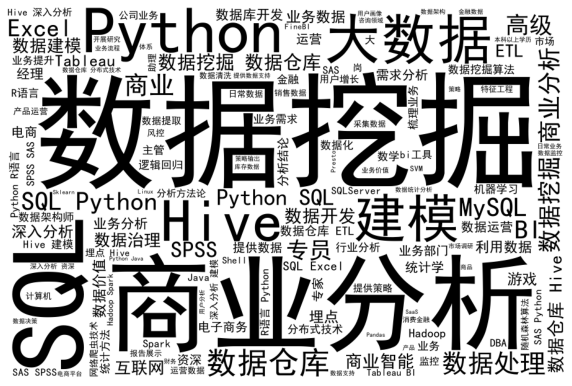

In [41]:
from wordcloud import WordCloud
text = df['tags'].dropna().to_string()
text=text.replace("数据分析师",'')
text=text.replace("数据分析工程师",'')
text=text.replace("数据分析员",'')
text=text.replace("数据分析",'')

# 绘制词云图
plt.figure(figsize=(10,8))
wordcloud = WordCloud(font_path = "simhei.ttf",
                      background_color = "white",
                      min_font_size = 10,
                      color_func = lambda *args, **kwargs:(0,0,0),
                      width = 900, height = 600).generate(text)
plt.imshow(wordcloud)
plt.axis("off")

此图显示各个企业对数据分析师职业技能需求的关键字。数据挖掘，商业分析,python,数据仓库,建模，SQL是最需要的技能。

## 结论 

通过以上简要分析，可以发现，如果要成功转行，应该往北上广深行这几个城市考虑，这些城市的薪资水平高
而行业方面应该着眼于互联网及电子商务等新兴行业，这些行业对该岗位的需求都比较大，而且薪资水平也普遍高
工作经验对于该岗位而言非常重要，能否成功转行的关键门槛在于是否有工作经验，与薪资水平呈正相关
而转行成功以后，只有在迈过3年这个坎，才会有比较大的突破